## CUSTOMER SEGMENTATION WITH K-NEAREST NEIGHBOUR (KNN)

### **ABSTRACT**
One of the roadmaps for a successful company is a customer centric experience. In building an excellent customer experience it is important to know what every customer needs through the available information, insights as well as feedbacks collated over the years of business. A proper analysis of these outputs will give rise to the Customer segregation which is a vast array of different customers and their varying needs promoting an efficient service delivery instead of an individual approach which would be cumbersome as well as not being cost effective. In this project, we combine two data sets using the KNN classification algorithm to segment our customers into groups and test our model for accuracy. KNN is a supervised learning approach which uses proximity to make classification or predictions about the grouping of an individual data point. While it is commonly used for classification problems, it can also be used to solve regression problems. Classification problems are what we intend to solve in this project. How it solves the problem when classifying is just to assign the data point to the group that has the most observed data point out of its neighbors, and this depends on the number of neighbors selected. In our dataset, customers are segmented into 4 categories based on features like gender, marital status, age, work experience, etc. The datasets we will be using were gotten from Kaggle.

### **INTRODUCTION**

Customer segmentation is the process of dividing clients into segments based on similar characteristics. This is done using specific variables such as demographics like age, race, and sex; behavioral, psychographic, geographical data, etc. When customers are segmented, it helps identify needs as it relates to each segment and deliver the appropriate messages across. It also minimizes risk by figuring out which products are the most likely to earn a share of a target market and the best ways to market and deliver those products to the market A combination of two data sets using the KNN classification algorithm will test our model and predict future expectations.It will help find similarities between people who are currently customers and people who are not. This information is important to find groups of potential new customers which are people who are not currently customers but have high similarities with people who are. This will also give directions into a right marketing campaign.

#### METHODOLOGY


![](Methodology.png)

##### PROJECT UNDERSTANDING

Customer segmentation using the KNN classification algorithm. To find groups of potential new customers who have high similarities with existing customers. This will also give insights into the right marketing campaign. We have been given a dataset with several customers and their details and they have been separated into 4 segments which is based on the combination of features like work experience, age, profession, etc.


##### DATA REQUIREMENT
The Dataset used for this project was gotten from Kaggle [here](https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation?select=train.csv). The dataset is titled 'Customer Segmentation'. It shows multiclass classification of an automobile company with plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). The data set have identified 2627 new potential customers.

##### ANALYTIC UNDERSTANDING

KNN is a supervised learning approach which uses proximity to make classification or predictions about the grouping of an individual data point. While it is commonly used for classification problems, it can also be used to solve regression problems. Classification problems are what we intend to solve in this project. How it solves the problem when classifying is just to assign the data point to the group that has the most observed data point out of its neighbors, and this depends on the number of neighbors selected. KNN is prone to the effects of curse of dimensionality, which means, the model doesn’t do well with high dimensional data. Data with high dimensions are the ones with a lot of features. To avoid this, we try to reduce the dimension of our data by feature engineering or dropping irrelevant features.

##### DATA PREPARATION

The features that were not needed such as ID number of the customers and other anonymized categories were dropped. Features such as gender and profession were label encoded because our model would not be able to work with strings. Age and work experience columns were also scaled, so the model doesn’t assign too much importance to them because of their relatively large values. Some missing values were dropped and some were filled. Pandas was imported to read the csv files and numpy was also imported to fix missing values. Label encoder was imported from ‘sklearn.preprocessing’ to convert sting values to numeric.

##### MODELING

After we were done with all our pre-processing work, the KNN model were fitted with 4 neighbors as we have 4 different groups. For every other parameters, the default values were used. The features (independent variable) to be used were stored in the variable ‘X’, and the target variable, which was segmentation was stored in the variable ‘y’.The dataset was divided into training and testing data. The model was fitted on the training data, and tested for accuracy on the testing data. KNearestNeighbors was imported from the neighbors module of sklearn.

##### EVALUATION

After fitting our model, the model was evaluated by scoring both the training data and the testing data. Accuracy score and classification score were used to test our model. They were both imported from ‘sklearn.metrics’.

In [1]:
# Importing our libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
#importing dataset
train= pd.read_csv('train.csv')
train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [3]:
#Getting insights about our data
train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


##### VISUALS

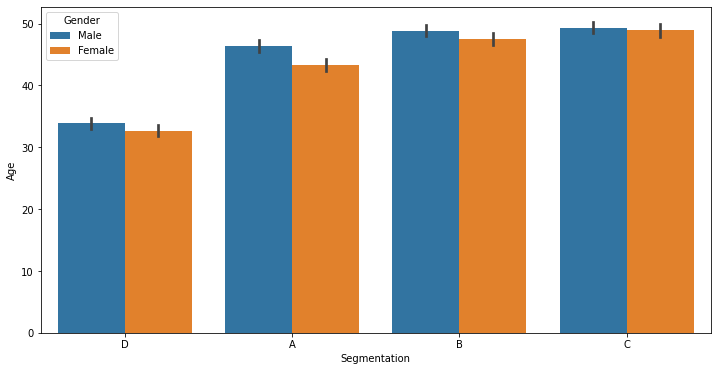

In [5]:
fig1=plt.figure(figsize=(12,6))
sns.barplot(x='Segmentation', y= 'Age', data=train, hue='Gender');
fig1.savefig('barplot_seg.png');   

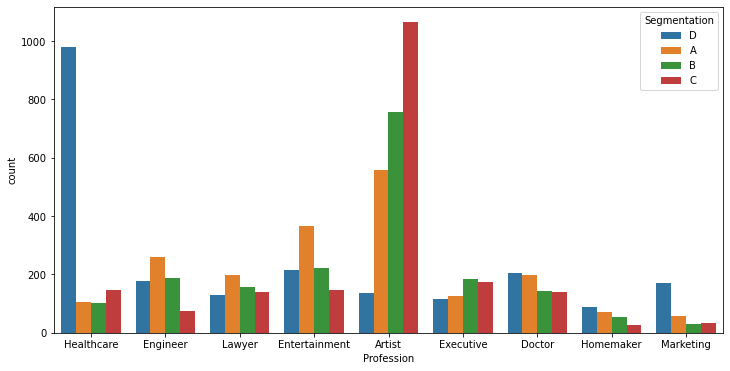

In [6]:
# Grouping our segments according to profession
plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(x=train['Profession'], hue = 'Segmentation', data = train);  

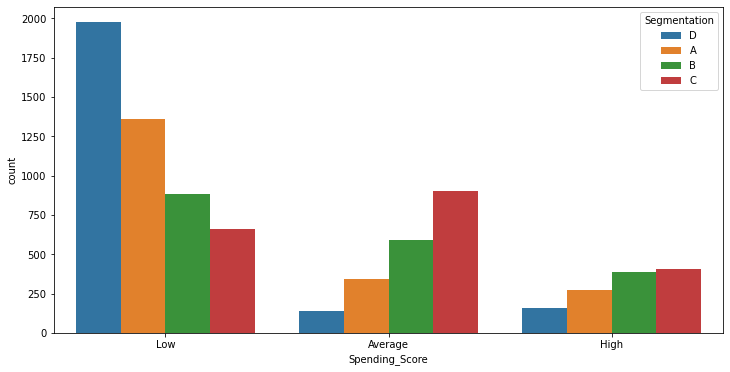

In [7]:
# Grouping our segments according to Spending score
sns.countplot(x= train ['Spending_Score'], data=train, hue='Segmentation');

Visualizations do not completely show much information about what feature dominates a particular segmentation. So, we
would need an algorithm like KNN or other deep learning models to get the insights.

##### Preprocessing

In [8]:
train.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [9]:
# Droppping rows that are not needed
train = train.drop(['ID', 'Var_1'], axis = 1)
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


In [10]:
#The number of missing values in our dataset
train.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64

####### First task was replacing these missing values


In [11]:
# For Family_size replacing the missing values with the median value
median_family_size = train['Family_Size'].median()
median_family_size
train['Family_Size'].replace(np.nan, median_family_size, inplace = True)
train['Family_Size'].value_counts()

2.0    2390
3.0    1832
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

In [12]:
# For Work_Experience (missing values with the median value)
median_Work_Experience = train['Work_Experience'].median()
median_Work_Experience
train['Work_Experience'].replace(np.nan, median_Work_Experience, inplace = True)

# Replacing the missing profession values
train['Profession'].replace(np.nan, 'Not stated', inplace = True)
train.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession           0
Work_Experience      0
Spending_Score       0
Family_Size          0
Segmentation         0
dtype: int64

In [13]:
# Casting the datatypes of selected features to strings
train['Gender'] = train['Gender'].astype('str')
train['Ever_Married'] = train['Ever_Married'].astype('str')
train['Graduated'] = train['Graduated'].astype('str')

In [14]:
# Encoding our variable to enable our model work effectively
enc = LabelEncoder()
train['gender'] = enc.fit_transform(train['Gender'])
train['ever_married'] = enc.fit_transform(train['Ever_Married'])
train['graduated'] = enc.fit_transform(train['Graduated'])
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,gender,ever_married,graduated
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D,1,0,0
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,A,0,1,1
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B,0,1,1
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B,1,1,1
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,A,0,1,1


In [15]:
# Dropping the encoded features
df = train.drop(['Gender', 'Ever_Married', 'Graduated'], axis = 1)
df.head()

,Age,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,gender,ever_married,graduated
0,22,Healthcare,1.0,Low,4.0,D,1,0,0
1,38,Engineer,1.0,Average,3.0,A,0,1,1
2,67,Engineer,1.0,Low,1.0,B,0,1,1
3,67,Lawyer,0.0,High,2.0,B,1,1,1
4,40,Entertainment,1.0,High,6.0,A,0,1,1


In [16]:
#Converting the strings in Spending column to integer
mapping = {'Low': 1, 'Average': 2, 'High': 3}
df['Spending_Score'] = df['Spending_Score'].map(mapping)
df.head()

,Age,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,gender,ever_married,graduated
0,22,Healthcare,1.0,1,4.0,D,1,0,0
1,38,Engineer,1.0,2,3.0,A,0,1,1
2,67,Engineer,1.0,1,1.0,B,0,1,1
3,67,Lawyer,0.0,3,2.0,B,1,1,1
4,40,Entertainment,1.0,3,6.0,A,0,1,1


In [17]:
#Creating dummy variables from profession column
small_df = pd.get_dummies(df['Profession'])
small_df.head()

,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Not stated
0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0


In [18]:
# Adding the dummy values to the main dataframe
df = pd.concat([df, small_df], axis = 1)
df.head()

,Age,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,gender,ever_married,graduated,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Not stated
0,22,Healthcare,1.0,1,4.0,D,1,0,0,0,0,0,0,0,1,0,0,0,0
1,38,Engineer,1.0,2,3.0,A,0,1,1,0,0,1,0,0,0,0,0,0,0
2,67,Engineer,1.0,1,1.0,B,0,1,1,0,0,1,0,0,0,0,0,0,0
3,67,Lawyer,0.0,3,2.0,B,1,1,1,0,0,0,0,0,0,0,1,0,0
4,40,Entertainment,1.0,3,6.0,A,0,1,1,0,0,0,1,0,0,0,0,0,0


In [19]:
#Dropping Profession column after adding the dummy values
df.drop(['Profession'], axis = 1, inplace = True)

In [20]:
df.head()

,Age,Work_Experience,Spending_Score,Family_Size,Segmentation,gender,ever_married,graduated,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Not stated
0,22,1.0,1,4.0,D,1,0,0,0,0,0,0,0,1,0,0,0,0
1,38,1.0,2,3.0,A,0,1,1,0,0,1,0,0,0,0,0,0,0
2,67,1.0,1,1.0,B,0,1,1,0,0,1,0,0,0,0,0,0,0
3,67,0.0,3,2.0,B,1,1,1,0,0,0,0,0,0,0,1,0,0
4,40,1.0,3,6.0,A,0,1,1,0,0,0,1,0,0,0,0,0,0


Complete analytic understanding and workings of data [here]
(https://github.com/RidwanTiamiyu/super-parakeet/blob/main/code.pdf) 

In [21]:
# Assigning our target and features
X, y = df.drop('Segmentation', axis = 1), df['Segmentation']
X.head()

,Age,Work_Experience,Spending_Score,Family_Size,gender,ever_married,graduated,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Not stated
0,22,1.0,1,4.0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,38,1.0,2,3.0,0,1,1,0,0,1,0,0,0,0,0,0,0
2,67,1.0,1,1.0,0,1,1,0,0,1,0,0,0,0,0,0,0
3,67,0.0,3,2.0,1,1,1,0,0,0,0,0,0,0,1,0,0
4,40,1.0,3,6.0,0,1,1,0,0,0,1,0,0,0,0,0,0


In [22]:
y

0       D
1       A
2       B
3       B
4       A
       ..
8063    D
8064    D
8065    D
8066    B
8067    B
Name: Segmentation, Length: 8068, dtype: object

In [23]:
# Scaling our features so that the large values don't have much extra effect on the model t
scaler = MinMaxScaler()
X['scaled_age'] = scaler.fit_transform(X['Age'].values.reshape(-1,1))
X['scaled_Work_Experience'] = scaler.fit_transform(X['Work_Experience'].values.reshape(-1,1))
X['scaled_Family_size'] = scaler.fit_transform(X['Family_Size'].values.reshape(-1,1))
X.head() 

,Age,Work_Experience,Spending_Score,Family_Size,gender,ever_married,graduated,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Not stated,scaled_age,scaled_Work_Experience,scaled_Family_size
0,22,1.0,1,4.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.056338,0.071429,0.375
1,38,1.0,2,3.0,0,1,1,0,0,1,0,0,0,0,0,0,0,0.281690,0.071429,0.250
2,67,1.0,1,1.0,0,1,1,0,0,1,0,0,0,0,0,0,0,0.690141,0.071429,0.000
3,67,0.0,3,2.0,1,1,1,0,0,0,0,0,0,0,1,0,0,0.690141,0.000000,0.125
4,40,1.0,3,6.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0.309859,0.071429,0.625


In [24]:
#Dropping the original, unscaled features
X.drop(['Age', 'Work_Experience','Family_Size'], axis = 1, inplace = True)

In [25]:
X.head()

,Spending_Score,gender,ever_married,graduated,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Not stated,scaled_age,scaled_Work_Experience,scaled_Family_size
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0.056338,0.071429,0.375
1,2,0,1,1,0,0,1,0,0,0,0,0,0,0,0.281690,0.071429,0.250
2,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0.690141,0.071429,0.000
3,3,1,1,1,0,0,0,0,0,0,0,1,0,0,0.690141,0.000000,0.125
4,3,0,1,1,0,0,0,1,0,0,0,0,0,0,0.309859,0.071429,0.625


In [26]:
#Splitting our dataset in preparation for model application
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [27]:
#Instantiating and fitting our model
knn = KNeighborsClassifier(n_neighbors = 44, leaf_size = 15)
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=15, n_neighbors=44)

In [28]:
# Predicting our model
y_pred = knn.predict(X_test)

In [29]:
# Checking our training score
print(accuracy_score(y_train, knn.predict(X_train)))

0.533961328705999


In [30]:
# checking our testing score
print(accuracy_score(y_test, y_pred))

0.51165096678235


In [31]:
y_pred[:10]

array(['B', 'A', 'A', 'B', 'D', 'A', 'D', 'D', 'C', 'A'], dtype=object)

In [32]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.41      0.42      0.42       493
           B       0.39      0.36      0.38       464
           C       0.56      0.55      0.55       493
           D       0.64      0.68      0.66       567

    accuracy                           0.51      2017
   macro avg       0.50      0.50      0.50      2017
weighted avg       0.51      0.51      0.51      2017

[[208 123  67  95]
 [104 168 133  59]
 [ 70  94 269  60]
 [123  47  10 387]]


In [33]:
for i in range(1,6):
 print(2 * i)

2
4
6
8
10


In [34]:
# List Hyperparameters that we want to tune
leaf_size = 2 * list(range(1,10))
n_neighbors = 4 * list(range(1,15))
p = [1,2]

In [ ]:
#Convert to dictionary
hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p = p)

#Creating a new KNN model
knn2 = KNeighborsClassifier()

#Use gridsearch
clf = GridSearchCV(knn2, hyperparameters, cv = 10)

#fit the model
best_model = clf.fit(X_train, y_train)

In [ ]:
print('Best leaf_size: {}'.format(best_model.best_estimator_.get_params()['leaf_size']))
print('Best p: {}'.format(best_model.best_estimator_.get_params()['p']))
print('Best n_neighbors: {}'.format(best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
knn3 = KNeighborsClassifier(p = 2, leaf_size = 12, n_neighbors = 56)
knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
# checking our testing score
print(accuracy_score(y_test, y_pred))

In [ ]:
print(best_model.get_params())

##### Segmenting our test dataset using the best model

In [ ]:
test = pd.read_csv('test.csv')
test.head()

In [ ]:
test = test.drop(['ID', 'Var_1'], axis = 1)
test.head()

In [ ]:
median_family_size = test['Family_Size'].median()
# Replacing the missing values with the median value
test['Family_Size'].replace(np.nan, median_family_size, inplace = True)

median_Work_Experience = test['Work_Experience'].median()
median_Work_Experience
# Replacing the missing values with the median value
test['Work_Experience'].replace(np.nan, median_Work_Experience, inplace = True)

# Replacing the missing profession values
test['Profession'].replace(np.nan, 'Not stated', inplace = True)

test.dropna(inplace = True)
test.isnull().sum()

In [ ]:
# Casting the datatypes of selected features to strings
test['Gender'] = test['Gender'].astype('str')
test['Ever_Married'] = test['Ever_Married'].astype('str')
test['Graduated'] = test['Graduated'].astype('str')

In [ ]:
# Encoding our variable to enable our model work effectively
enc = LabelEncoder()
test['gender'] = enc.fit_transform(test['Gender'])
test['ever_married'] = enc.fit_transform(test['Ever_Married'])
test['graduated'] = enc.fit_transform(test['Graduated'])
test.head()

In [ ]:
test.drop(['Gender', 'Ever_Married', 'Graduated'], axis = 1, inplace = True)

mapping = {'Low': 1, 'Average': 2, 'High': 3}
test['Spending_Score'] = test['Spending_Score'].map(mapping)
test.head()

In [ ]:
#Creating dummy variables from profession column
small_test = pd.get_dummies(test['Profession'])
small_test

In [ ]:
# Adding the dummy values to the main dataframe
test = pd.concat([test, small_test], axis = 1)
test

In [ ]:
test.drop('Profession', axis = 1, inplace = True)

In [ ]:
# Scaling our features so that the large values don't have much extra effect on the model t
scaler = MinMaxScaler()
test['scaled_age'] = scaler.fit_transform(test['Age'].values.reshape(-1,1))
test['scaled_Work_Experience'] = scaler.fit_transform(test['Work_Experience'].values.reshape (-1,1))
test['scaled_Family_size'] = scaler.fit_transform(test['Family_Size'].values.reshape(-1,1))

#Dropping the original, unscaled features
test.drop(['Age', 'Work_Experience','Family_Size'], axis = 1, inplace = True)

test.head()

In [ ]:
segments = knn.predict(test)
segments[:10]

In [ ]:
test['Segmentation'] = segments
test.head()

In [ ]:
test.to_csv('segmented_test.csv')

##### Conclusion

- After trying several other combinations of features, the combination that resulted in the highest testing
score was one that used all the relevant features with scaling and encoding where appropriate. The scores
we got are still low.
- Visualizations didn't show any distinct segment where a feature dominates
- Training score is usually low when we dont have enough entries in our dataset but that isn't the case here.
It's likely that the segmentation was done randomly or the dataset have missing information.